In [6]:
# Importando as bibliotecas necessárias
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Função para carregar os dados de um arquivo JSON
def load_data(filename):
    """
    Carrega os dados do arquivo JSON para um DataFrame.
    
    Args:
        filename (str): Caminho do arquivo JSON.
    
    Returns:
        pd.DataFrame: Dados em formato DataFrame.
    """
    try:
        with open(filename, "r", encoding="utf-8") as f:
            data = json.load(f)
        # Convertendo os dados para DataFrame
        df = pd.DataFrame(data['results'])
        return df
    except Exception as e:
        print(f"Erro ao carregar os dados: {e}")
        return None


In [15]:
# Função para tratar dados corrompidos ou faltantes
def clean_data(df):
    """
    Função para tratar dados corrompidos ou faltantes.
    
    Args:
        df (pd.DataFrame): Dados originais do DataFrame.
    
    Returns:
        pd.DataFrame: Dados tratados.
    """
    # Remover colunas desnecessárias (exemplo)
    columns_to_drop = ['background_image', 'rating', 'platforms']
    df = df.drop(columns=columns_to_drop, errors='ignore')
    
    # Substituir valores ausentes por 'Desconhecido' (Exemplo)
    df.fillna({'name': 'Desconhecido', 'genres': 'Desconhecido'}, inplace=True)
    
    # Garantir que a coluna 'genres' seja uma string, no caso de ser uma lista ou dicionário
    def process_genres(x):
        if isinstance(x, list):  # Se for uma lista, juntar os itens
            return ', '.join([str(g) for g in x])
        elif isinstance(x, dict):  # Se for um dicionário, tentar extrair o nome do gênero
            return x.get('name', 'Desconhecido')
        else:
            return str(x)  # Se for qualquer outro tipo, converter para string
    
    df['genres'] = df['genres'].apply(process_genres)
    
    return df


In [16]:
# Função para visualizar os dados
def visualize_data(df):
    """
    Função para criar gráficos de visualização.
    
    Args:
        df (pd.DataFrame): Dados tratados.
    """
    # Exemplo de gráfico: Contagem de gêneros
    genre_counts = df['genres'].value_counts().head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x=genre_counts.index, y=genre_counts.values)
    plt.title("Top 10 Gêneros de Jogos")
    plt.xticks(rotation=45)
    plt.show()

    # Exemplo de gráfico: Jogos mais populares
    top_games = df[['name', 'released']].head(10)
    plt.figure(figsize=(10,6))
    sns.barplot(x='released', y='name', data=top_games)
    plt.title("Top 10 Jogos Mais Populares")
    plt.show()


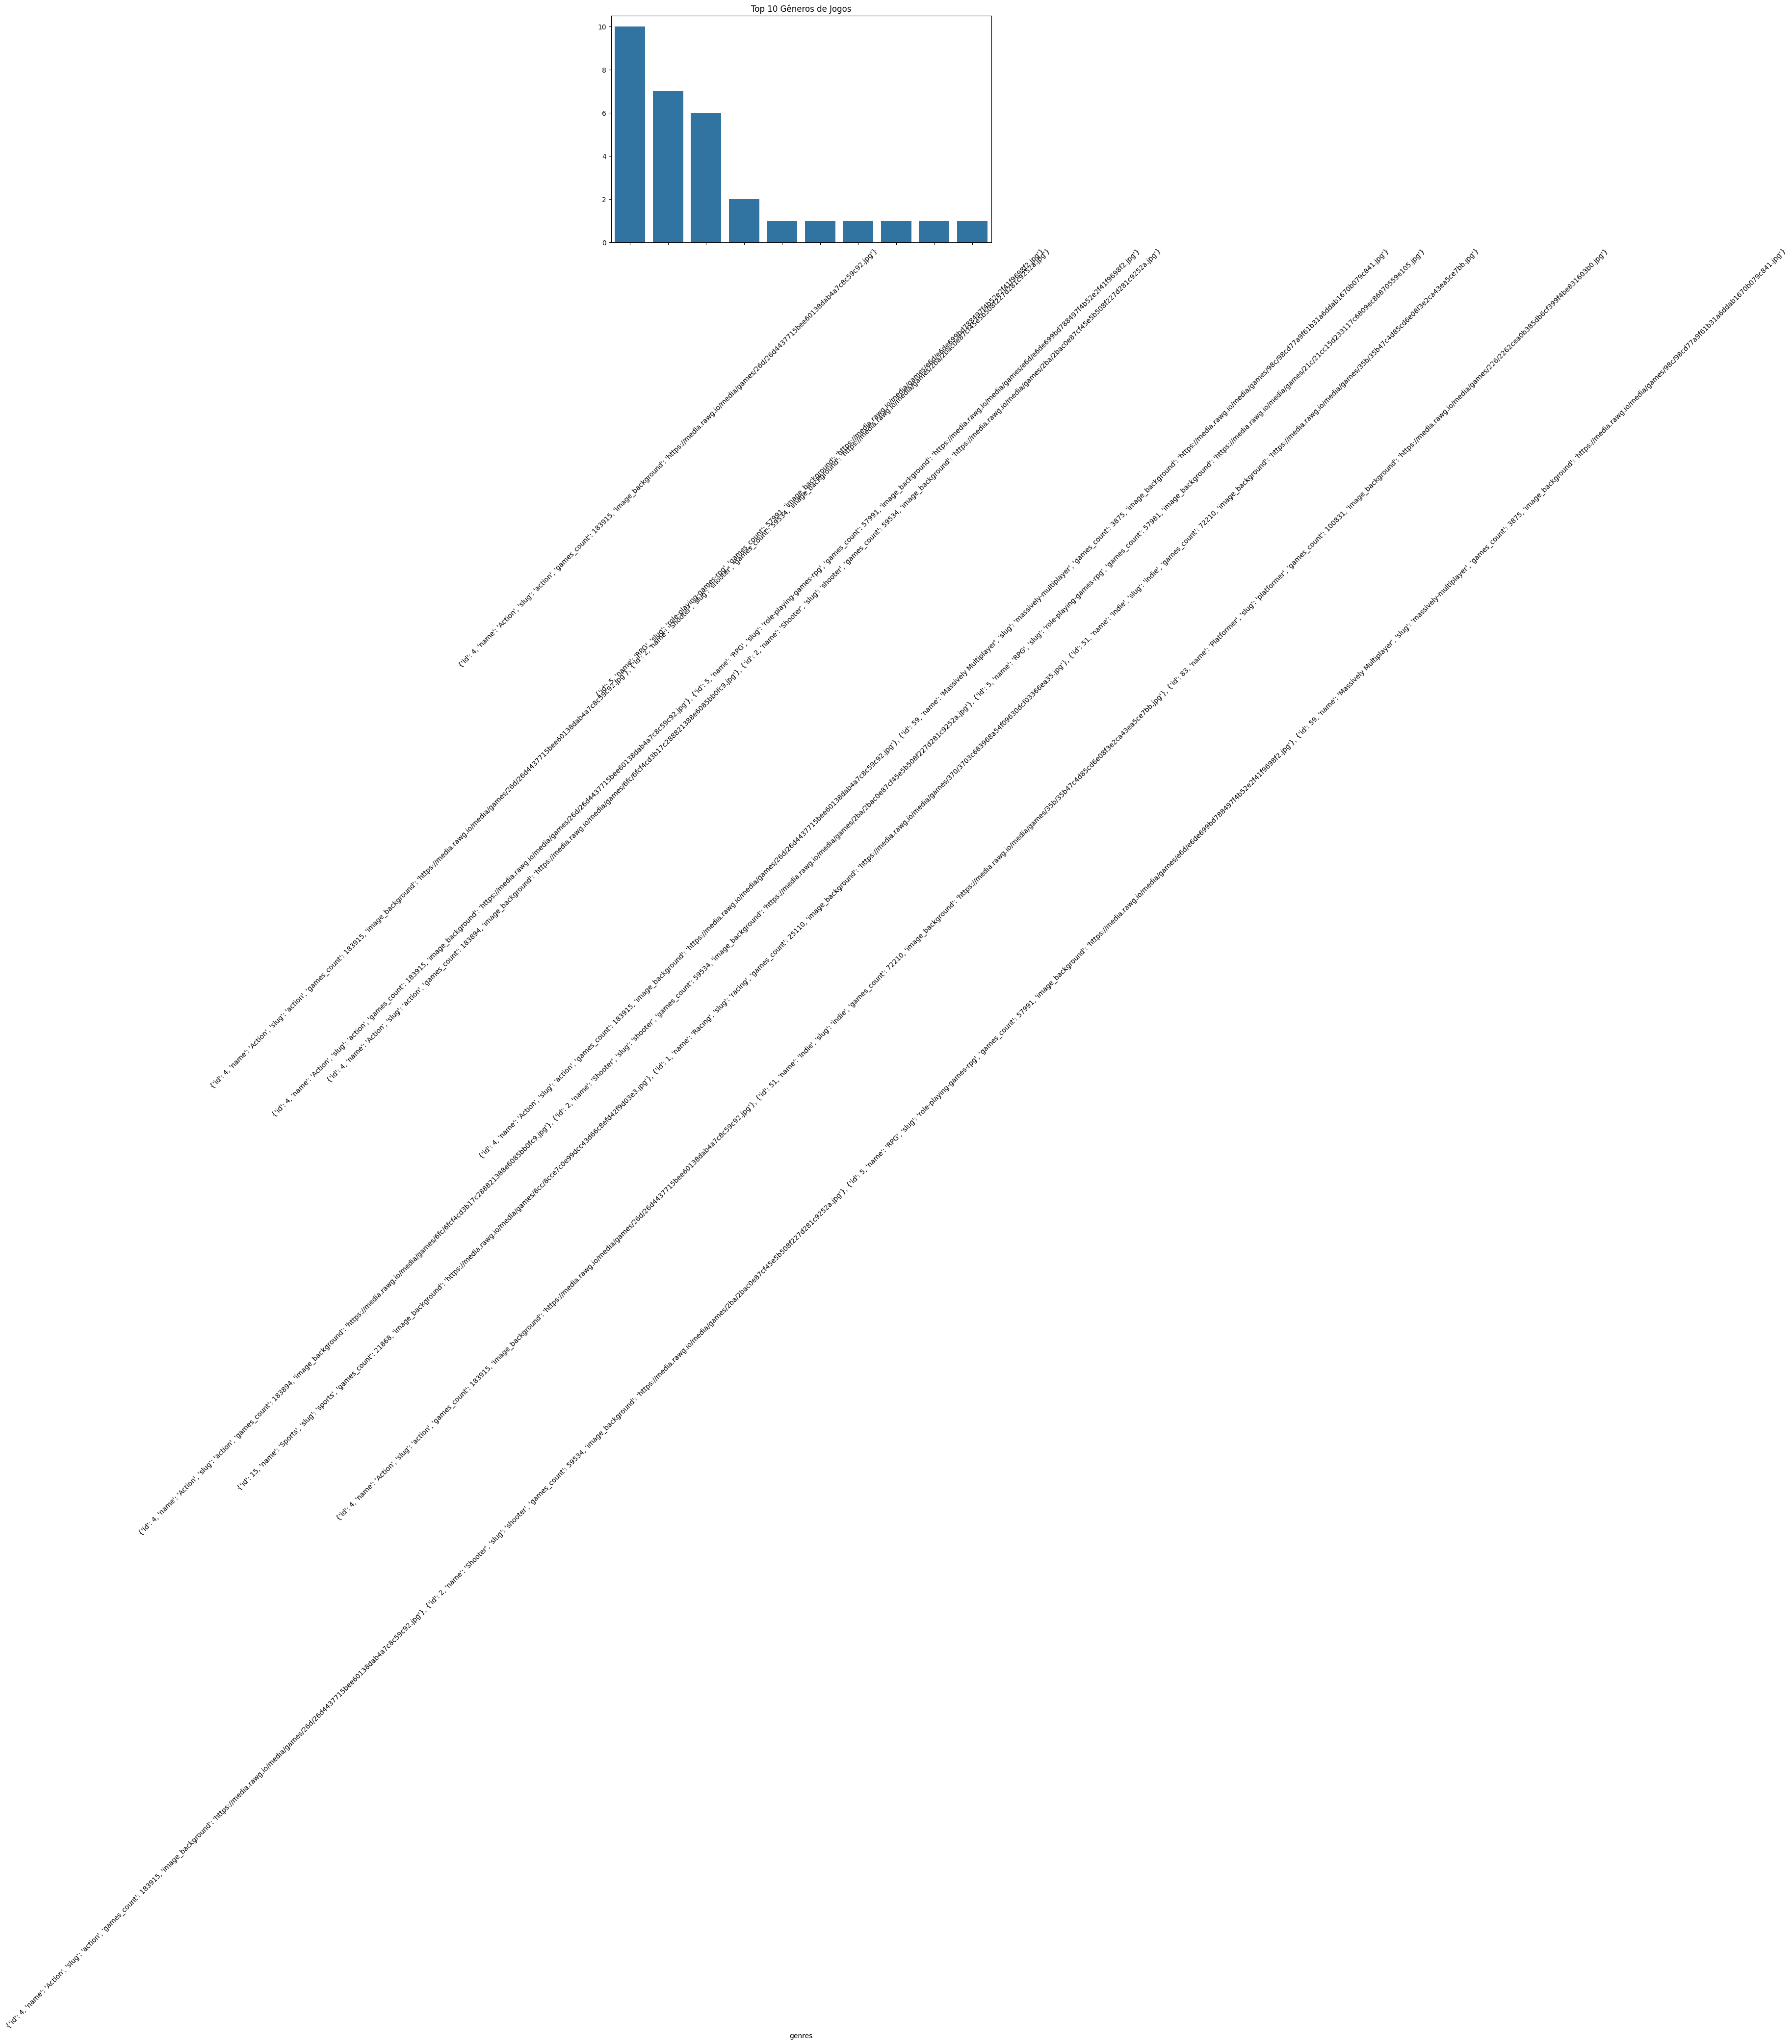

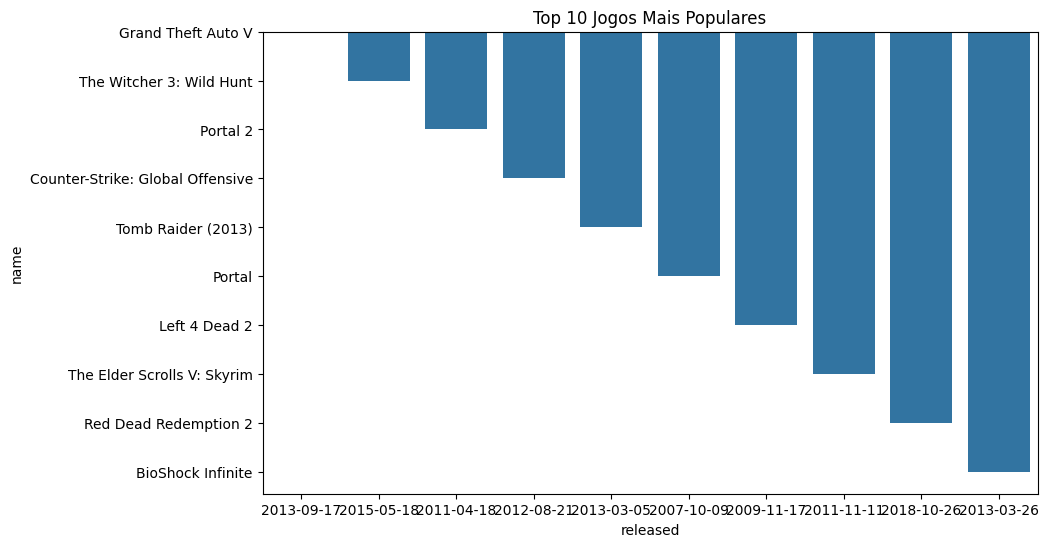

In [17]:
# Exemplo de como rodar as funções:
filename = '../streamlit/data/games_data.json'  # Caminho do arquivo JSON

df = load_data(filename)  # Carregar dados de um arquivo JSON
if df is not None:
    df = clean_data(df)  # Limpar os dados
    visualize_data(df)   # Visualizar os dados


In [25]:
# Expandir as listas de 'ratings' para visualizar seus itens internos
def expand_ratings(row):
    if isinstance(row, list):
        # Extraímos os títulos de rating
        return [item['title'] for item in row]
    return []

# Aplicar a função para expandir as listas da coluna 'ratings'
df['expanded_ratings'] = df['ratings'].apply(expand_ratings)

# Exibir as primeiras 100 linhas da nova coluna expandida
print(df['expanded_ratings'].head(100))


0     [exceptional, recommended, meh, skip]
1     [exceptional, recommended, meh, skip]
2     [exceptional, recommended, meh, skip]
3     [recommended, meh, exceptional, skip]
4     [recommended, exceptional, meh, skip]
5     [exceptional, recommended, meh, skip]
6     [recommended, exceptional, meh, skip]
7     [exceptional, recommended, meh, skip]
8     [exceptional, recommended, meh, skip]
9     [exceptional, recommended, meh, skip]
10    [recommended, exceptional, meh, skip]
11    [exceptional, recommended, meh, skip]
12    [exceptional, recommended, meh, skip]
13    [exceptional, recommended, meh, skip]
14    [recommended, meh, exceptional, skip]
15    [exceptional, recommended, meh, skip]
16    [recommended, meh, exceptional, skip]
17    [recommended, exceptional, meh, skip]
18    [recommended, meh, exceptional, skip]
19    [recommended, meh, exceptional, skip]
20    [exceptional, recommended, meh, skip]
21    [exceptional, recommended, meh, skip]
22    [recommended, exceptional,

In [26]:
# Ajustar para mostrar até 1000 linhas, por exemplo
pd.set_option('display.max_rows', 1000)
print(df['expanded_ratings'].head(100))


0     [exceptional, recommended, meh, skip]
1     [exceptional, recommended, meh, skip]
2     [exceptional, recommended, meh, skip]
3     [recommended, meh, exceptional, skip]
4     [recommended, exceptional, meh, skip]
5     [exceptional, recommended, meh, skip]
6     [recommended, exceptional, meh, skip]
7     [exceptional, recommended, meh, skip]
8     [exceptional, recommended, meh, skip]
9     [exceptional, recommended, meh, skip]
10    [recommended, exceptional, meh, skip]
11    [exceptional, recommended, meh, skip]
12    [exceptional, recommended, meh, skip]
13    [exceptional, recommended, meh, skip]
14    [recommended, meh, exceptional, skip]
15    [exceptional, recommended, meh, skip]
16    [recommended, meh, exceptional, skip]
17    [recommended, exceptional, meh, skip]
18    [recommended, meh, exceptional, skip]
19    [recommended, meh, exceptional, skip]
20    [exceptional, recommended, meh, skip]
21    [exceptional, recommended, meh, skip]
22    [recommended, exceptional,

In [35]:
# Função para calcular a média ponderada dos ratings
def calculate_weighted_average(ratings):
    if isinstance(ratings, list):  # Certificar que é uma lista
        weighted_sum = sum(rating['id'] * rating['percent'] for rating in ratings)  # Soma ponderada
        total_percent = sum(rating['percent'] for rating in ratings)  # Soma dos pesos
        return weighted_sum / total_percent if total_percent > 0 else None  # Evitar divisão por zero
    return None  # Retorna None para valores inválidos

# Aplicar a função à coluna 'ratings' para calcular a média ponderada
df['average_rating'] = df['ratings'].apply(calculate_weighted_average)

# Exibir as primeiras linhas para verificar os resultados
print(df[['ratings', 'average_rating']].head(10))


                                             ratings  average_rating
0  [{'id': 5, 'title': 'exceptional', 'count': 41...        4.471647
1  [{'id': 5, 'title': 'exceptional', 'count': 52...        4.648300
2  [{'id': 5, 'title': 'exceptional', 'count': 40...        4.598300
3  [{'id': 4, 'title': 'recommended', 'count': 16...        3.563900
4  [{'id': 4, 'title': 'recommended', 'count': 23...        4.057500
5  [{'id': 5, 'title': 'exceptional', 'count': 28...        4.499550
6  [{'id': 4, 'title': 'recommended', 'count': 17...        4.087600
7  [{'id': 5, 'title': 'exceptional', 'count': 27...        4.425400
8  [{'id': 5, 'title': 'exceptional', 'count': 38...        4.589800
9  [{'id': 5, 'title': 'exceptional', 'count': 22...        4.377500


In [36]:
# Exibir as primeiras 20 linhas para ver as médias ponderadas
print(df[['ratings', 'average_rating']].head(20))


                                              ratings  average_rating
0   [{'id': 5, 'title': 'exceptional', 'count': 41...        4.471647
1   [{'id': 5, 'title': 'exceptional', 'count': 52...        4.648300
2   [{'id': 5, 'title': 'exceptional', 'count': 40...        4.598300
3   [{'id': 4, 'title': 'recommended', 'count': 16...        3.563900
4   [{'id': 4, 'title': 'recommended', 'count': 23...        4.057500
5   [{'id': 5, 'title': 'exceptional', 'count': 28...        4.499550
6   [{'id': 4, 'title': 'recommended', 'count': 17...        4.087600
7   [{'id': 5, 'title': 'exceptional', 'count': 27...        4.425400
8   [{'id': 5, 'title': 'exceptional', 'count': 38...        4.589800
9   [{'id': 5, 'title': 'exceptional', 'count': 22...        4.377500
10  [{'id': 4, 'title': 'recommended', 'count': 15...        4.016800
11  [{'id': 5, 'title': 'exceptional', 'count': 16...        4.114789
12  [{'id': 5, 'title': 'exceptional', 'count': 24...        4.486100
13  [{'id': 5, 'titl

In [ ]:
# Função para mapear a média ponderada para a escala de 1 a 10
def map_to_10_scale(average_rating):
    if average_rating is not None:
        return ((average_rating - 1) / 4) * 9 + 1  # Mapeia de 1-5 para 1-10
    return None  # Retorna None se a média não for válida

# Aplicar a função à coluna 'average_rating' para transformar em nota de 1 a 10
df['rating_1_to_10'] = df['average_rating'].apply(map_to_10_scale)

# Exibir as primeiras linhas para verificar os resultados
print(df[['average_rating', 'rating_1_to_10']].head(10))


   average_rating  rating_1_to_10
0        4.471647        8.811206
1        4.648300        9.208675
2        4.598300        9.096175
3        3.563900        6.768775
4        4.057500        7.879375
5        4.499550        8.873987
6        4.087600        7.947100
7        4.425400        8.707150
8        4.589800        9.077050
9        4.377500        8.599375


In [39]:
# Verificando o conteúdo da coluna 'added_by_status' antes de tentar convertê-lo
print(df['added_by_status'].head())

0    {'yet': 535, 'owned': 12336, 'beaten': 6063, '...
1    {'yet': 1135, 'owned': 12222, 'beaten': 4928, ...
2    {'yet': 639, 'owned': 12467, 'beaten': 5575, '...
3    {'yet': 265, 'owned': 13442, 'beaten': 1065, '...
4    {'yet': 687, 'owned': 11141, 'beaten': 4277, '...
Name: added_by_status, dtype: object
